In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('search_data.csv')

In [3]:
data['Avg Order Venue Position'].dropna()

0      0.713619
1      4.210777
2      3.903846
3      0.217544
4      0.887399
         ...   
467    0.000000
468    0.166667
469    2.000000
470    0.000000
472    0.000000
Name: Avg Order Venue Position, Length: 445, dtype: float64

/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


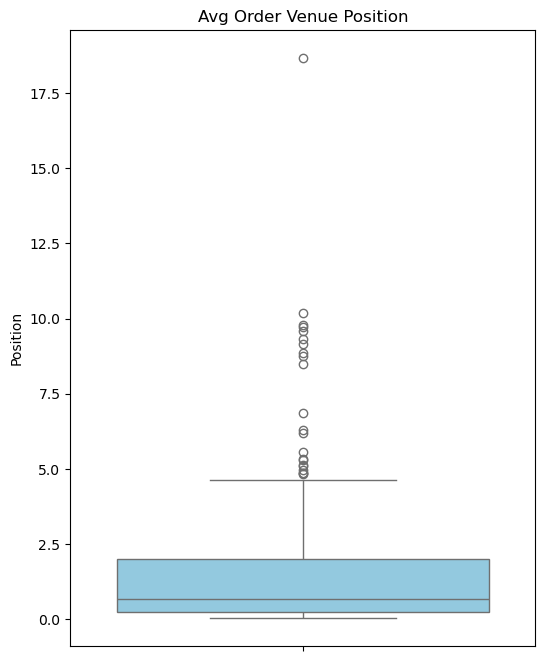

In [4]:
filtered_data = data[data['Avg Order Venue Position'] > 0]
plt.figure(figsize=(6, 8))
sns.boxplot(y='Avg Order Venue Position', data=filtered_data, color='skyblue')
plt.title('Avg Order Venue Position')
plt.ylabel('Position')
plt.show()

In [5]:
data = pd.read_csv('search_data.csv')
data = data.dropna()
lb = data['Search Count'].quantile(0.1)
#data = data[data['Search Count'] > lb]
string_columns = data.select_dtypes(include=['object'])

# Select columns where at least one value contains '%'
percentage_columns = string_columns.loc[:, string_columns.apply(lambda col: col.str.contains('%', na=False).any())]
for col in percentage_columns :
    data[col] = data[col].str.replace('%', '').astype(float) / 100
data["conversion"] = data["Conversion Rate"] * data["Search Count"]
data.describe()

,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,177.348315,0.500709,0.033209,0.481399,0.143696,0.006033,0.137711,1.103314,0.161807,0.030663,28.770675
std,347.230643,0.128341,0.060479,0.136048,0.065627,0.017674,0.067786,1.948137,0.771330,0.031790,71.880953
min,36.000000,0.087700,0.000000,0.014700,0.007500,0.000000,0.000000,0.000000,0.000000,0.000000,0.998400
25%,50.000000,0.423500,0.000000,0.403800,0.096200,0.000000,0.090900,0.000000,0.000000,0.011500,5.998300
50%,76.000000,0.514900,0.013700,0.495500,0.148800,0.000000,0.142900,0.312500,0.000000,0.024400,11.001000
75%,147.000000,0.590900,0.031300,0.578000,0.186800,0.002200,0.181800,1.233766,0.000000,0.041700,23.004600
max,4295.000000,0.795500,0.478300,0.795500,0.449300,0.152200,0.449300,18.666667,11.833333,0.229200,1068.166500


In [6]:
type_count = data.groupby("Query Type")["Search Count"].count()
print(type_count)

Query Type
recent_searches     32
tag                 13
text               400
Name: Search Count, dtype: int64


In [7]:
# How many searches for each query type --> there are fewer tags but higher searches counts
sum_search_count = data.groupby("Query Type")["Search Count"].sum()
print(sum_search_count)

Query Type
recent_searches     3305
tag                 8555
text               67060
Name: Search Count, dtype: int64


In [8]:
average_search= round(sum_search_count/type_count)
print(average_search)

Query Type
recent_searches    103.0
tag                658.0
text               168.0
Name: Search Count, dtype: float64


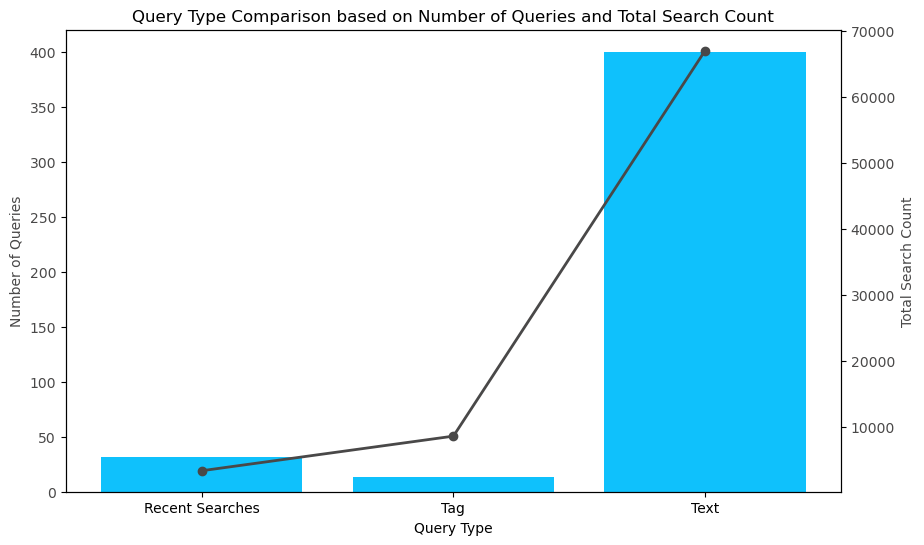

In [9]:
import matplotlib.pyplot as plt

type_count = data.groupby("Query Type")["Search Count"].count()
sum_search_count = data.groupby("Query Type")["Search Count"].sum()

query_types = type_count.index
query_types = ["Recent Searches", "Tag", "Text"]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(query_types, type_count, color="#0fc1fc", label="Number of Queries")
ax1.set_xlabel("Query Type")
ax1.set_ylabel("Number of Queries", color="#494848")
ax1.tick_params(axis="y", labelcolor="#494848")

ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(query_types, sum_search_count, color="#494848", marker="o", linewidth=2, label="Total Search Count")
ax2.set_ylabel("Total Search Count", color="#494848")
ax2.tick_params(axis="y", labelcolor="#494848")

ax2.grid(False)

plt.title("Query Type Comparison based on Number of Queries and Total Search Count")


plt.savefig("query_type_comparison1.png", format='png', dpi=300, bbox_inches='tight')  

plt.show()

In [10]:
# Average conversion rate by query types
data.groupby("Query Type")["Conversion Rate"].mean()

Query Type
recent_searches    0.189422
tag                0.130362
text               0.140471
Name: Conversion Rate, dtype: float64

In [11]:
# Tag searches have much higher conversion
data.groupby("Query Type")["conversion"].mean()

Query Type
recent_searches     19.780675
tag                107.679123
text                26.925351
Name: conversion, dtype: float64

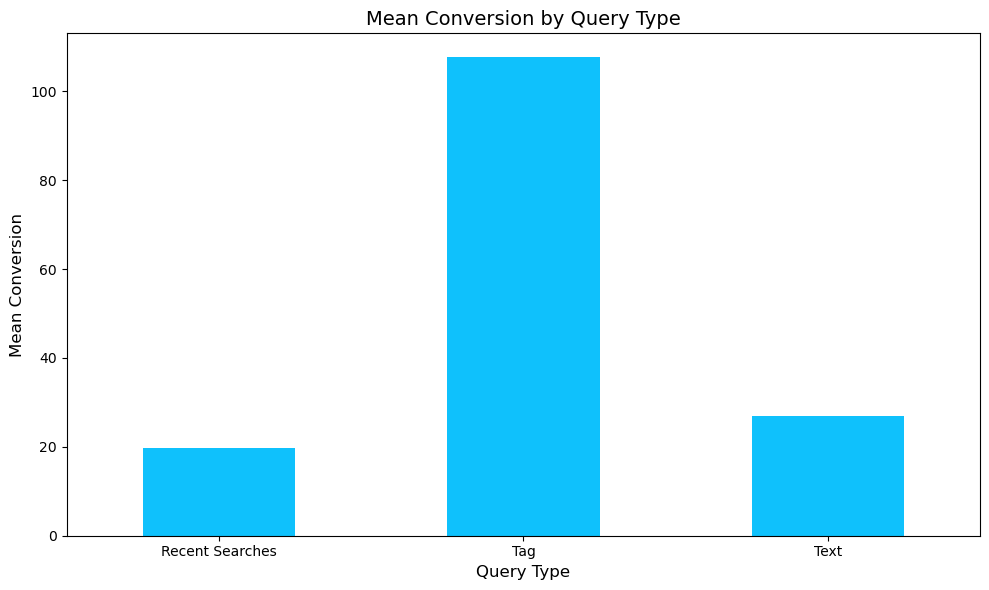

In [12]:
# Calculate mean conversion for each query type
mean_conversion = data.groupby("Query Type")["conversion"].mean()

# Define custom x-axis categories
custom_labels = ["Recent Searches", "Tag", "Text"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for mean conversions
mean_conversion.plot(kind='bar', color="#0fc1fc", ax=ax)

# Labels and title
ax.set_xlabel("Query Type", fontsize=12)
ax.set_ylabel("Mean Conversion", fontsize=12)
ax.set_title("Mean Conversion by Query Type", fontsize=14)
ax.grid(False)
# Set custom x-axis labels
ax.set_xticklabels(custom_labels, rotation=0, fontsize=10)

# Improve layout
plt.tight_layout()
plt.savefig("query_type_conversion1.png", format='png', dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [13]:
# The 13 tags
data[data["Query Type"] == "tag"]

,Query Text,Query Type,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion
1,burger,tag,3250,0.4862,0.0486,0.4658,0.1938,0.0092,0.1846,4.210777,0.079239,0.0311,629.8500
11,nepalese,tag,1125,0.5191,0.0169,0.5147,0.1938,0.0009,0.1929,4.388128,0.054795,0.0258,218.0250
16,chinese,tag,978,0.5869,0.0429,0.5716,0.1728,0.0020,0.1708,4.236686,0.011834,0.0276,168.9984
27,healthy,tag,529,0.5047,0.0548,0.4820,0.0888,0.0038,0.0870,4.270833,0.041667,0.0132,46.9752
29,indian,tag,495,0.4970,0.0465,0.4768,0.1313,0.0101,0.1232,2.287879,0.121212,0.0444,64.9935
31,mexican,tag,453,0.5077,0.0177,0.4989,0.1347,0.0022,0.1325,2.327869,0.000000,0.0287,61.0191
34,poke bowl,tag,439,0.5057,0.0752,0.4692,0.1298,0.0159,0.1139,2.807018,0.263158,0.0068,56.9822
38,noodle,tag,396,0.4848,0.0631,0.4596,0.1136,0.0051,0.1086,1.733333,0.155556,0.0202,44.9856
44,sandwich,tag,354,0.5169,0.0621,0.4944,0.1469,0.0113,0.1356,1.773585,0.188679,0.0565,52.0026
90,grocery,tag,190,0.4474,0.0000,0.4474,0.1947,0.0000,0.1947,1.378378,0.000000,0.0211,36.9930


In [14]:
# Text searches are mostly restauraunt names
data[data["Query Type"] == "text"].nlargest(13, 'Search Count')

,Query Text,Query Type,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion
0,subway,text,4295,0.5800,0.0121,0.5753,0.2487,0.0033,0.2454,0.713619,0.015858,0.0403,1068.1665
2,burger,text,1942,0.3007,0.0191,0.2904,0.1071,0.0031,0.1040,3.903846,0.043269,0.0371,207.9882
3,mcdonalds,text,1806,0.4967,0.0078,0.4922,0.1578,0.0000,0.1578,0.217544,0.000000,0.0282,284.9868
4,picnic,text,1452,0.5475,0.0220,0.5365,0.2555,0.0021,0.2534,0.887399,0.002681,0.0227,370.9860
5,burger king,text,1423,0.6015,0.0141,0.5966,0.2080,0.0021,0.2059,0.787879,0.016835,0.0337,295.9840
6,taco bell,text,1305,0.5448,0.0069,0.5418,0.2038,0.0000,0.2038,0.274436,0.000000,0.0284,265.9590
7,hesburger,text,1283,0.1699,0.0031,0.1691,0.0351,0.0000,0.0351,2.422222,0.000000,0.0304,45.0333
8,lie mi,text,1146,0.5122,0.0524,0.4651,0.2016,0.0070,0.1946,0.588745,0.025974,0.0157,231.0336
9,pizza hut,text,1144,0.5953,0.0175,0.5813,0.1713,0.0009,0.1705,0.423469,0.000000,0.0201,195.9672
10,boneless,text,1139,0.5874,0.0281,0.5742,0.1756,0.0018,0.1738,1.530000,0.000000,0.0272,200.0084


In [15]:
data.nlargest(10, 'conversion')

,Query Text,Query Type,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion
0,subway,text,4295,0.5800,0.0121,0.5753,0.2487,0.0033,0.2454,0.713619,0.015858,0.0403,1068.1665
1,burger,tag,3250,0.4862,0.0486,0.4658,0.1938,0.0092,0.1846,4.210777,0.079239,0.0311,629.8500
4,picnic,text,1452,0.5475,0.0220,0.5365,0.2555,0.0021,0.2534,0.887399,0.002681,0.0227,370.9860
5,burger king,text,1423,0.6015,0.0141,0.5966,0.2080,0.0021,0.2059,0.787879,0.016835,0.0337,295.9840
3,mcdonalds,text,1806,0.4967,0.0078,0.4922,0.1578,0.0000,0.1578,0.217544,0.000000,0.0282,284.9868
6,taco bell,text,1305,0.5448,0.0069,0.5418,0.2038,0.0000,0.2038,0.274436,0.000000,0.0284,265.9590
14,king kebab,text,1061,0.5382,0.0123,0.5306,0.2469,0.0038,0.2441,0.988593,0.030418,0.0189,261.9609
8,lie mi,text,1146,0.5122,0.0524,0.4651,0.2016,0.0070,0.1946,0.588745,0.025974,0.0157,231.0336
11,nepalese,tag,1125,0.5191,0.0169,0.5147,0.1938,0.0009,0.1929,4.388128,0.054795,0.0258,218.0250
2,burger,text,1942,0.3007,0.0191,0.2904,0.1071,0.0031,0.1040,3.903846,0.043269,0.0371,207.9882


In [16]:
# Top recent searches are restaurants
data[data["Query Type"] == "recent_searches"].nlargest(10, 'conversion')

,Query Text,Query Type,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion
25,subway,recent_searches,542,0.5775,0.0185,0.5701,0.1900,0.0092,0.1808,0.567308,0.038462,0.0664,102.9800
72,mcdonalds,recent_searches,241,0.6058,0.0083,0.5975,0.2158,0.0041,0.2116,0.075472,0.245283,0.0207,52.0078
110,taco bell,recent_searches,158,0.6013,0.0063,0.5949,0.2342,0.0000,0.2342,0.243243,0.000000,0.0190,37.0036
89,burger king,recent_searches,192,0.6146,0.0000,0.6146,0.1667,0.0000,0.1667,0.468750,0.000000,0.0313,32.0064
97,boneless,recent_searches,177,0.5085,0.0169,0.4972,0.1808,0.0000,0.1808,0.406250,0.000000,0.0678,32.0016
133,k market,recent_searches,132,0.6894,0.0000,0.6894,0.2348,0.0000,0.2348,2.032258,0.000000,0.0758,30.9936
114,burger,recent_searches,153,0.4706,0.0523,0.4444,0.1830,0.0000,0.1830,4.857143,0.000000,0.0588,27.9990
155,pizza hut,recent_searches,107,0.6168,0.0093,0.6075,0.2523,0.0000,0.2523,1.518519,0.000000,0.0187,26.9961
144,king kebab,recent_searches,118,0.4831,0.0169,0.4746,0.2119,0.0085,0.2034,0.800000,0.000000,0.0254,25.0042
164,picnic,recent_searches,101,0.5644,0.0099,0.5545,0.2277,0.0099,0.2178,3.913043,0.000000,0.0297,22.9977


In [17]:
data.groupby("Query Text")

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Query Text'])
num_clusters = 50 # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each query text
data['Cluster'] = kmeans.labels_
data[["Query Text",'Cluster']] 

/opt/software/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Query Text,Cluster
0,subway,17
1,burger,11
2,burger,11
3,mcdonalds,1
4,picnic,16
...,...,...
467,waffle,1
468,oishi 18,1
469,lemon grass,1
470,gurkha,1


In [19]:
grouped_query = data.groupby("Cluster")['Query Text'].agg(list).reset_index()

In [20]:
for ind, row in grouped_query.iterrows():
    print(row['Query Text'])

['kamppi']
['mcdonalds', 'hesburger', 'kotkot', 'naughty', 'levain', 'eat poke', 'healthy', 'chitir', 'levant', 'sushibar', 'vapiano', 'hesbur', 'kotipizza', 'breakfast', 'skiffer', 'tacobell', 'mcdona', 'mashiro', 'salad', 'mcdonal', 'bastard', 'pronto', 'tortilla', 'friend', 'korean', 'pizzahut', 'puttes', 'tripla', 'mcdonalds', 'breakfast', 'gateau', 'chalupa', 'döner harju', 'intersport', 'kmarket', 'grocery', 'momento', 'vegetarian', 'nepali', 'burgerking', 'prisma', 'tandoori', 'siipiweikot', 'morton', 'tortilla house', 'arnold', 'dumplings', 'espress', 'treffi', 'musti ja mirri', 'kot kot', 'soup', 'cafe', 'coffee', 'vallila', 'peking', 'ice cream', 'bonele', 'pho viet', 'smoothie', 'grill', 'matcha', 'seksico', 'burrito', 'stockmann', 'capperi', 'capris', 'noodles', 'napoli', 'hair dye', 'mei lin', 'hesburger ', 'magnum', 'karkki', 'snacky', 'vietnam', 'bangkok', 'georgian', 'bubble tea', 'manala', 'everest', 'just vege', 'faselli', 'dif döner', 'classic', 'bärbar', 'sizzle', '

In [21]:
# lots of typos, improve by having suggestions (like youtube, google)
data.nlargest(30,"Share of Searches with Empty Result")

,Query Text,Query Type,Search Count,Share of Searches with Interactions,Share of Searches with Interactions Items,Share of Searches with Interactions Venues,Conversion Rate,Conversion Rate Items,Conversion Rate Venues,Avg Order Venue Position,Avg Order Item Position,Share of Searches with Empty Result,conversion,Cluster
363,barots,text,48,0.6667,0.0000,0.6667,0.1458,0.0000,0.1458,0.000000,0.0,0.2292,6.9984,1
289,mcdonals,text,62,0.3871,0.0000,0.3871,0.1613,0.0000,0.1613,0.200000,0.0,0.2097,10.0006,1
205,burger,text,83,0.3614,0.0120,0.3494,0.1325,0.0000,0.1325,0.545455,0.0,0.2048,10.9975,11
413,macdonalds,text,42,0.4286,0.0000,0.4286,0.1667,0.0000,0.1667,0.142857,0.0,0.1905,7.0014,1
398,siipiveikot,text,44,0.3182,0.0000,0.3182,0.1818,0.0000,0.1818,0.000000,0.0,0.1591,7.9992,1
400,kaalimato,text,44,0.7955,0.0227,0.7955,0.0455,0.0000,0.0455,0.000000,0.0,0.1591,2.0020,1
365,sunway,text,47,0.1915,0.0000,0.1915,0.0638,0.0000,0.0638,0.333333,0.0,0.1489,2.9986,1
81,intersport,text,220,0.4818,0.0636,0.4273,0.0091,0.0000,0.0091,0.000000,0.0,0.1364,2.0020,1
143,mcdonald’s,text,118,0.3983,0.0000,0.3983,0.1610,0.0000,0.1610,0.210526,0.0,0.1356,18.9980,8
201,mcdonald's,text,84,0.6429,0.0000,0.6429,0.1905,0.0000,0.1905,0.125000,0.0,0.1190,16.0020,8


In [22]:
filtered_data = data[data['Query Text'].str.contains('dona', case=False, na=False)]
sorted_data = filtered_data[['Query Text', 'Share of Searches with Empty Result']].sort_values(by='Share of Searches with Empty Result', ascending=False)
print(sorted_data)

      Query Text  Share of Searches with Empty Result
289     mcdonals                               0.2097
413   macdonalds                               0.1905
143   mcdonald’s                               0.1356
201  mcdonald's                                0.1190
182      mc dona                               0.0769
180     mc donal                               0.0745
313   mcdonald's                               0.0702
232    mc donald                               0.0676
294     mcdonald                               0.0492
52    mc donalds                               0.0483
43      mcdonald                               0.0394
58       mcdonal                               0.0339
50        mcdona                               0.0299
3      mcdonalds                               0.0282
72     mcdonalds                               0.0207
207   mc donalds                               0.0000


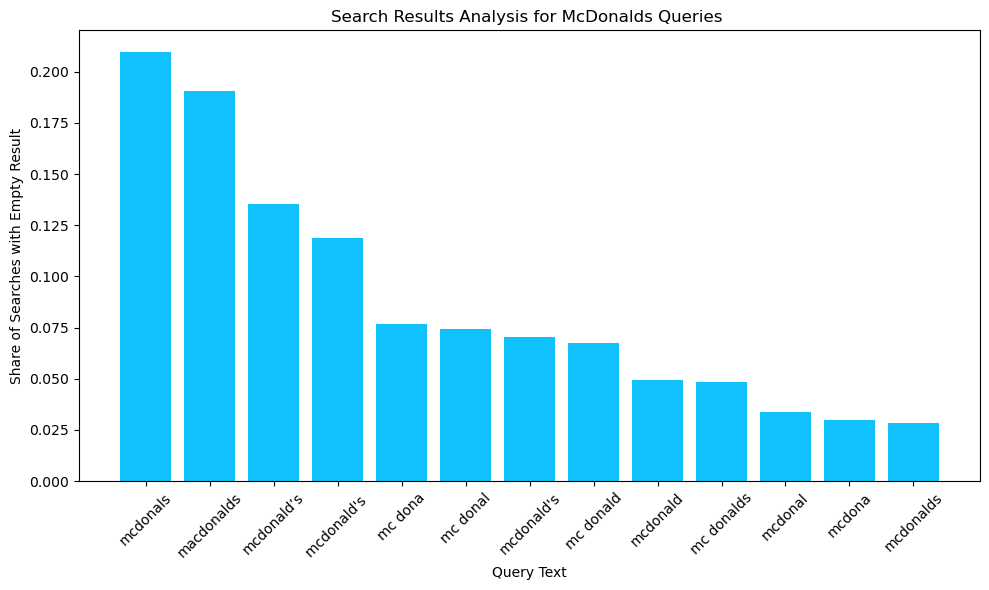

In [23]:

plt.figure(figsize=(10, 6))
plt.bar(sorted_data['Query Text'], sorted_data['Share of Searches with Empty Result'], color='#0fc1fc')
plt.xlabel('Query Text')
plt.ylabel('Share of Searches with Empty Result')
plt.title('Search Results Analysis for McDonalds Queries ')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.grid(False)

plt.tight_layout()
plt.savefig("mcdonalds.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Apply conditional logic to create the 'Interaction Dominance' and 'Conversion Dominance' column
data['Interaction Dominance'] = np.where(
    data['Share of Searches with Interactions Items'] > data['Share of Searches with Interactions Venues'], "Item Dominant", 
    np.where(data['Share of Searches with Interactions Items'] < data['Share of Searches with Interactions Venues'], "Venue Dominant", "Equal")
)

data['Conversion Dominance'] = np.where(
    data['Conversion Rate Items'] > data['Conversion Rate Venues'], "Item Dominant", 
    np.where(data['Conversion Rate Items'] < data['Conversion Rate Venues'], "Venue Dominant", "Equal")
)


In [25]:
# Calculate percentage of each category
percentage_interaction = data['Interaction Dominance'].value_counts(normalize=True) * 100

# Display the result
print(percentage_interaction)

percentage_conversion = data['Conversion Dominance'].value_counts(normalize=True) * 100

# Display the result
print(percentage_conversion)


Interaction Dominance
Venue Dominant    98.426966
Item Dominant      1.573034
Name: proportion, dtype: float64
Conversion Dominance
Venue Dominant    95.056180
Item Dominant      2.921348
Equal              2.022472
Name: proportion, dtype: float64


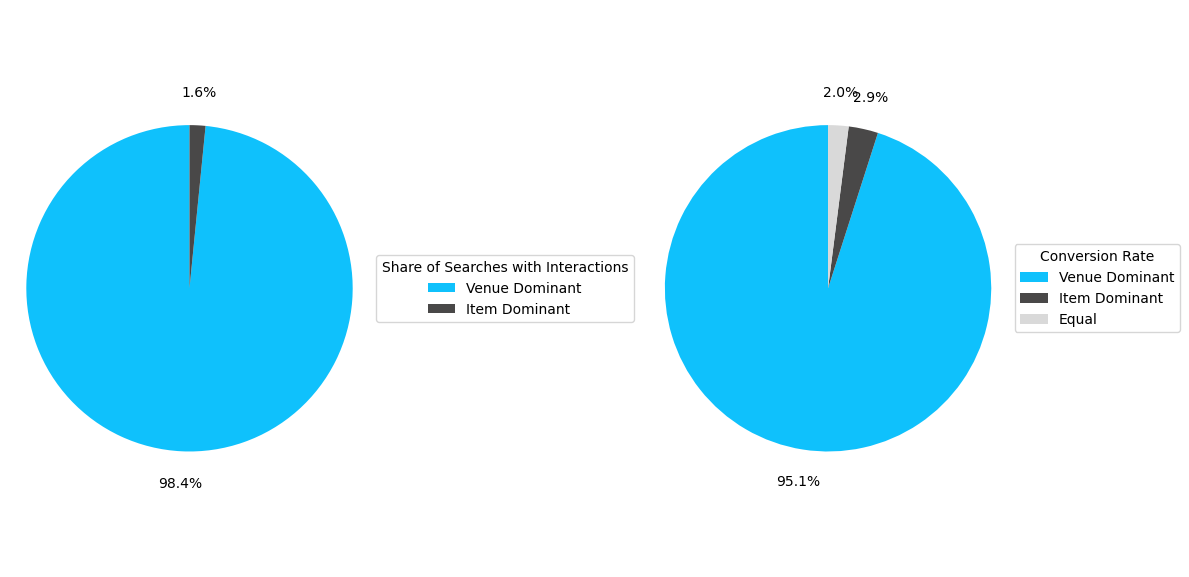

In [26]:
colors = ['#0fc1fc', '#494848', '#d9d9d9'] 

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

wedges1, texts1, autotexts1 = axs[0].pie(
    percentage_interaction,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(percentage_interaction)],
    radius=0.7,  
    labeldistance=1.1,  
    pctdistance=1.2  
)

axs[0].legend(wedges1, percentage_interaction.index, title="Share of Searches with Interactions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

axs[0].axis('equal')  

wedges2, texts2, autotexts2 = axs[1].pie(
    percentage_conversion,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(percentage_conversion)],
    radius=0.7, 
    labeldistance=1.1, 
    pctdistance=1.2 
)

axs[1].legend(wedges2, percentage_conversion.index, title="Conversion Rate", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.savefig("dominance_distribution2.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

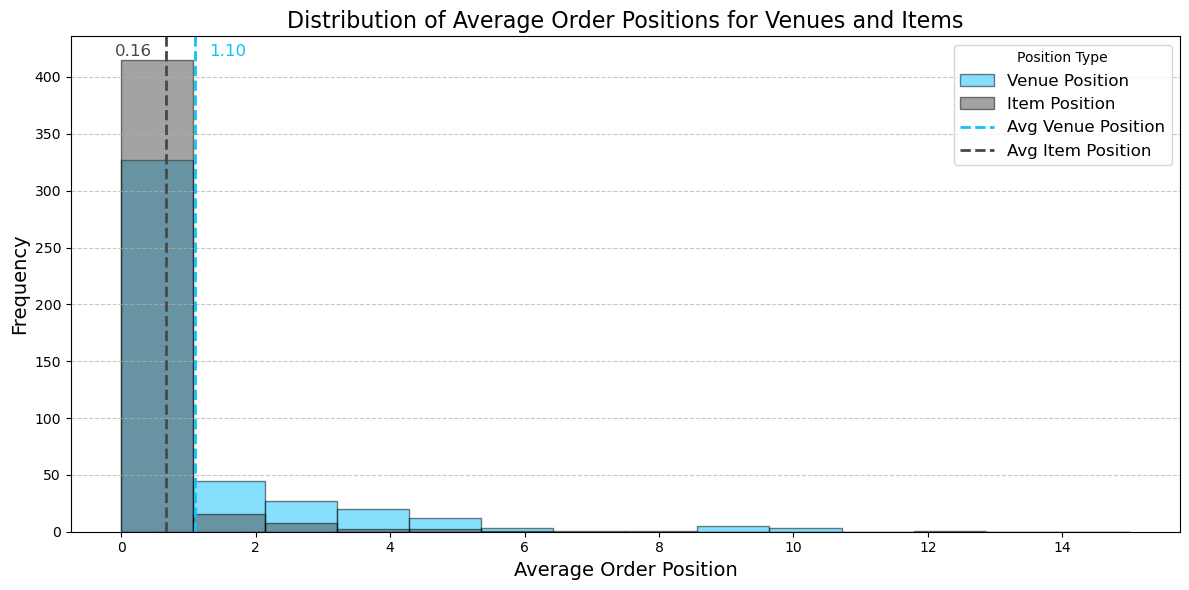

In [27]:
# Calculate means
venue_mean = data['Avg Order Venue Position'].mean()
item_mean = data['Avg Order Item Position'].mean()

plt.figure(figsize=(12, 6))

# Define bins for both histograms
bins = np.linspace(0, 15, 15)  # Adjust bin edges as needed for your data

# Create the histogram for Venue Position
plt.hist(data['Avg Order Venue Position'], bins=bins, alpha=0.5, color='#0fc1fc', label='Venue Position', edgecolor='black')

# Create the histogram for Item Position, with a slight offset
plt.hist(data['Avg Order Item Position'] + 0.5, bins=bins, alpha=0.5, color='#494848', label='Item Position', edgecolor='black')

# Add vertical lines for the means
plt.axvline(venue_mean, color='#0fc1fc', linestyle='--', linewidth=2, label='Avg Venue Position')
plt.axvline(item_mean + 0.5, color='#494848', linestyle='--', linewidth=2, label='Avg Item Position')

# Annotate the means on the plot, adjusting positions
plt.text(venue_mean + 0.2, plt.ylim()[1] * 0.96, f'{venue_mean:.2f}', color='#0fc1fc', ha='left', fontsize=12)  # Venue mean on the right
plt.text(item_mean + 0.5 - 0.2, plt.ylim()[1] * 0.96, f'{item_mean:.2f}', color='#494848', ha='right', fontsize=12)  # Item mean on the left

# Customize the plot
plt.title('Distribution of Average Order Positions for Venues and Items', fontsize=16)
plt.xlabel('Average Order Position', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Position Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("position.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:
# Apply the conditional logic
def interaction_dominance(row):
    if row['Share of Searches with Interactions Items'] > row['Share of Searches with Interactions Venues']:
        return "Item Dominant"
    elif row['Share of Searches with Interactions Items'] < row['Share of Searches with Interactions Venues']:
        return "Venue Dominant"
    else:
        return "Equal"

# Create a new column based on the logic
data['Interaction Dominance'] = data.apply(interaction_dominance, axis=1)


In [29]:
# Apply the conditional logic
def conversion_dominance(row):
    if row['Conversion Rate Items'] > row['Conversion Rate Venues']:
        return "Item Dominant"
    elif row['Conversion Rate Items'] < row['Conversion Rate Venues']:
        return "Venue Dominant"
    else:
        return "Equal"

# Create a new column based on the logic
data['Conversion Dominance'] = data.apply(conversion_dominance, axis=1)

In [30]:
# Select values from the 'Interaction Dominance' column where 'dominance' is "Item Dominant"
text_item_interaction = data.loc[data['Interaction Dominance'] == 'Item Dominant', 'Query Text']

print(text_item_interaction)

# Select values from the 'Conversion Dominance' column where 'dominance' is "Item Dominant"
text_item_conversion = data.loc[data['Conversion Dominance'] == 'Item Dominant', 'Query Text']

print(text_item_conversion)

167    butter chicken
206            korona
263           sausage
349          tiramisu
352            burana
370       koronatesti
378            buldak
Name: Query Text, dtype: object
146          hair dye
167    butter chicken
187       salmon soup
206            korona
256           biryani
263           sausage
339         phad thai
370       koronatesti
371           pumpkin
378            buldak
384            potato
404           risotto
451            cookie
Name: Query Text, dtype: object


In [31]:
# Extract unique queries for item dominance in interaction and conversion
item_interaction_queries = data.loc[data['Interaction Dominance'] == 'Item Dominant', 'Query Text'].unique()
item_conversion_queries = data.loc[data['Conversion Dominance'] == 'Item Dominant', 'Query Text'].unique()

# Convert to sets for easier comparison
set_interaction = set(item_interaction_queries)
set_conversion = set(item_conversion_queries)

# Identify overlapping and unique queries
overlap_queries = set_interaction.intersection(set_conversion)
interaction_only = set_interaction.difference(set_conversion)
conversion_only = set_conversion.difference(set_interaction)

print("Overlap Queries (Item Dominant in Both):", overlap_queries)
print("Interaction Only Queries:", interaction_only)
print("Conversion Only Queries:", conversion_only)


Overlap Queries (Item Dominant in Both): {'butter chicken', 'korona', 'buldak', 'koronatesti', 'sausage'}
Interaction Only Queries: {'tiramisu', 'burana'}
Conversion Only Queries: {'risotto', 'phad thai', 'salmon soup', 'biryani', 'potato', 'pumpkin', 'hair dye', 'cookie'}


In [32]:
pip install matplotlib-venn


Note: you may need to restart the kernel to use updated packages.


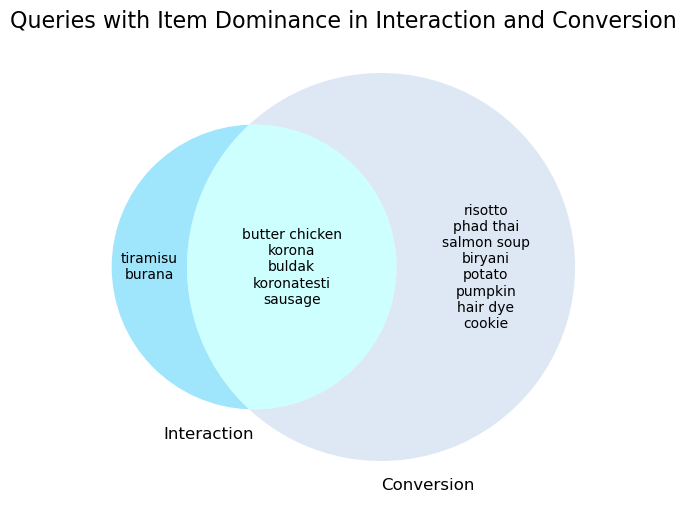

In [33]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert sets to strings without list brackets
interaction_only_text = "\n".join(interaction_only)
conversion_only_text = "\n".join(conversion_only)
overlap_text = "\n".join(overlap_queries)

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([set_interaction, set_conversion], ('Interaction', 'Conversion'), set_colors=('#0fc1fc', '#aec7e8'))

# Set custom labels with query texts
venn.get_label_by_id('10').set_text(interaction_only_text)
venn.get_label_by_id('01').set_text(conversion_only_text)
venn.get_label_by_id('11').set_text(overlap_text)

# Set title and show the plot
plt.title('Queries with Item Dominance in Interaction and Conversion', fontsize=16)
plt.savefig("venn.png", format='png', dpi=300, bbox_inches='tight')
plt.show()